In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_29161/357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_29161/357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2022-05-24 14:44:41.431451: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 14:44:41.431941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=10)

2022-05-24 14:44:50.064305: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-24 14:44:50.214816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
943/943 [==============================] - ETA: 0s - loss: 0.4291 - accuracy: 0.7887

2022-05-24 14:44:56.735370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 8s 7ms/step - loss: 0.4291 - accuracy: 0.7887 - val_loss: 0.3783 - val_accuracy: 0.8094
Epoch 2/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3780 - accuracy: 0.8126 - val_loss: 0.3738 - val_accuracy: 0.8112
Epoch 3/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3700 - accuracy: 0.8185 - val_loss: 0.3673 - val_accuracy: 0.8208
Epoch 4/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3707 - accuracy: 0.8146 - val_loss: 0.3659 - val_accuracy: 0.8153
Epoch 5/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3695 - accuracy: 0.8156 - val_loss: 0.3755 - val_accuracy: 0.8148
Epoch 6/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3719 - accuracy: 0.8128 - val_loss: 0.3690 - val_accuracy: 0.8120
Epoch 7/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3717 - accuracy: 0.8121 - val_loss: 0.3829 - val_accuracy: 0.8108
Epoch 8/10
943/94

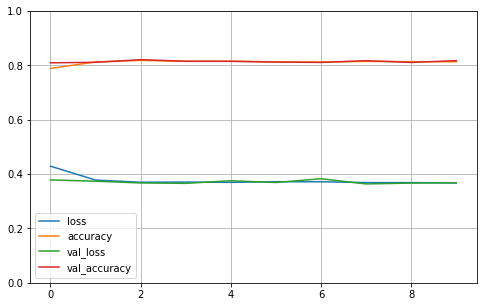

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 4ms/step - loss: 0.3681 - accuracy: 0.8173


[0.3680988848209381, 0.8173307180404663]

In [15]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") )

0.8173306772908366

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [16]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from sklearn import  metrics

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model1 = Sequential()
model1.add(Dense(100,activation="sigmoid", input_shape=(X_train_scaled.shape[1],)))
model1.add(Dense(50,activation="sigmoid"))
model1.add(Dense(10,activation="sigmoid"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()
model1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history1 = model1.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32, epochs=10)
model1.fit(X_train_scaled, y_train)

predict_x1=model1.predict(X_test_scaled) 
classes_x1=np.argmax(predict_x1,axis=1)
metrics.accuracy_score(y_true= y_test, y_pred=classes_x1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 10/943 [..............................] - ETA: 5s - loss: 0.5426 - accuracy: 0.7688  

2022-05-24 14:48:19.002974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8197

2022-05-24 14:48:24.408991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.3828 - accuracy: 0.8197 - val_loss: 0.3452 - val_accuracy: 0.8428
Epoch 2/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3381 - accuracy: 0.8437 - val_loss: 0.3341 - val_accuracy: 0.8468
Epoch 3/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3302 - accuracy: 0.8469 - val_loss: 0.3308 - val_accuracy: 0.8451
Epoch 4/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3263 - accuracy: 0.8477 - val_loss: 0.3279 - val_accuracy: 0.8472
Epoch 5/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3237 - accuracy: 0.8484 - val_loss: 0.3266 - val_accuracy: 0.8474
Epoch 6/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3224 - accuracy: 0.8484 - val_loss: 0.3254 - val_accuracy: 0.8480
Epoch 7/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3214 - accuracy: 0.8493 - val_loss: 0.3260 - val_accuracy: 0.8489
Epoch 8/10
943/94

2022-05-24 14:49:30.348931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.7543160690571049

471/471 [==============================] - 2s 3ms/step - loss: 0.3250 - accuracy: 0.8475


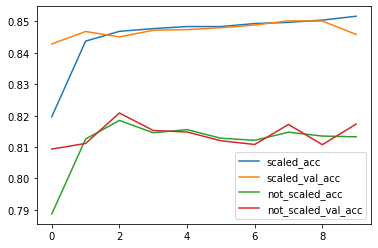

In [18]:
model1.evaluate(X_test_scaled,y_test)
plt.plot(history1.history['accuracy'], label = "scaled_acc")
plt.plot(history1.history['val_accuracy'], label = "scaled_val_acc")
plt.plot(history.history['accuracy'], label = "not_scaled_acc")
plt.plot(history.history['val_accuracy'], label = "not_scaled_val_acc")
plt.legend()
plt.show()